In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Reading the Data
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported")
data.head(15)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

There is no null value in the Dataset so, we can now visualize our Data.

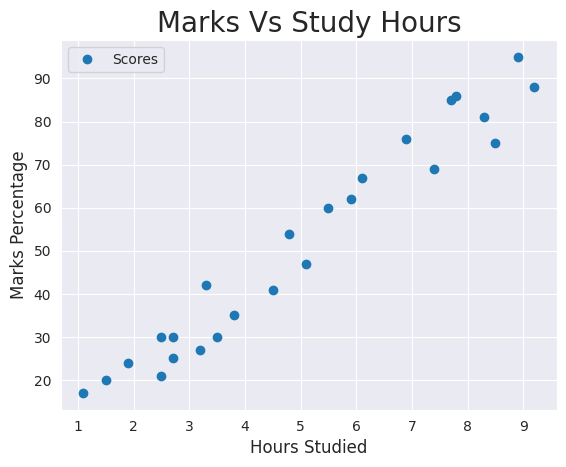

In [4]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
data.plot(x='Hours', y='Scores', style='o')
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be positive linear relation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

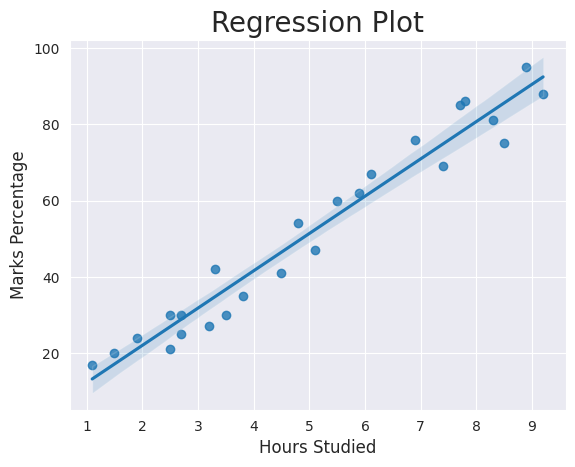

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

**Preparing the data**
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print(X,y)

#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Training model**

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


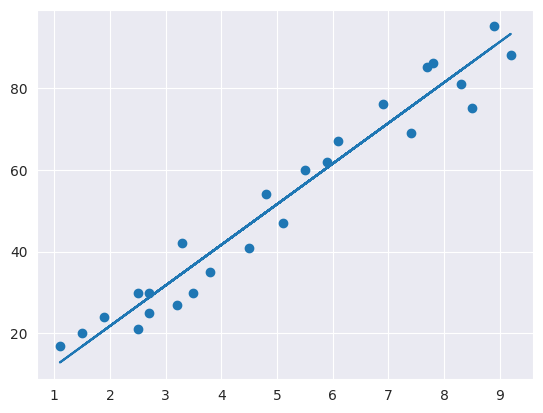

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predicting the Percentage of Marks**

In [9]:
print(X_test) # Testing data - In Hour
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visually Comparing the Predicted Marks with the Actual Marks**

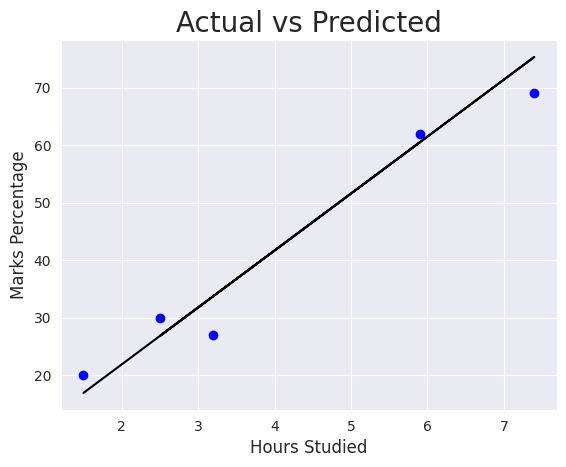

In [11]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Evaluating the Model**

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [13]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks.